# CIFAR-10 Deep Learning Classification
The objective is to build an image classification model using deep learning techniques to categorize images from the CIFAR-10 dataset into one of ten distinct classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck. This involves training a Convolutional Neural Network (CNN) that can learn and generalize patterns from the training data to accurately predict the class labels of unseen images.

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [17]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

## Display Test Images

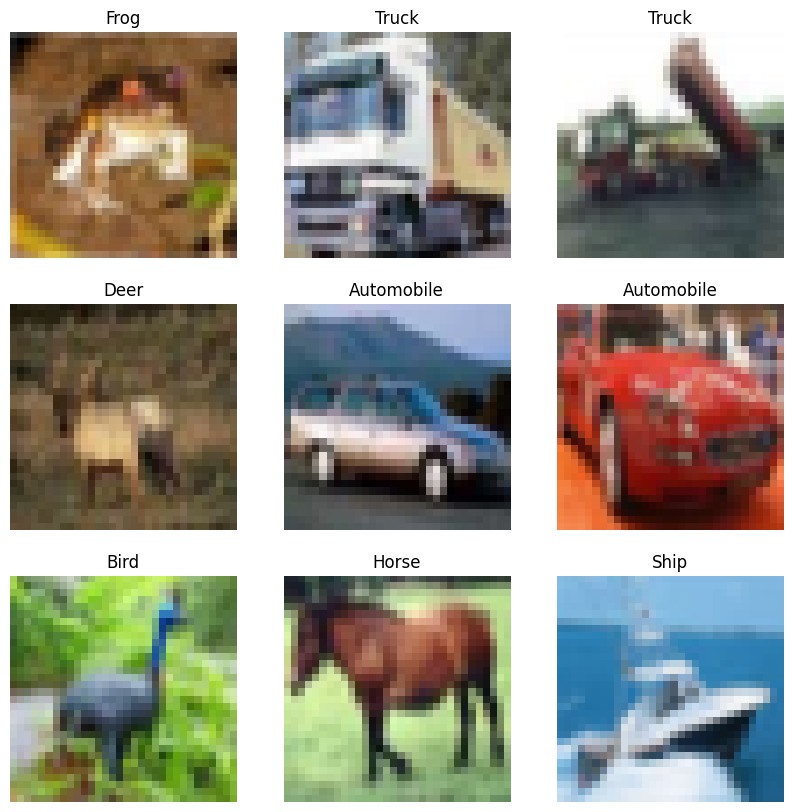

In [18]:
# Display the first 9 images of the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

## Build a Model

In [19]:
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten and add dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])

In [20]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

In [22]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3424 - loss: 1.7659 - val_accuracy: 0.5339 - val_loss: 1.2810
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5678 - loss: 1.2209 - val_accuracy: 0.6248 - val_loss: 1.0717
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6403 - loss: 1.0213 - val_accuracy: 0.6342 - val_loss: 1.0410
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6773 - loss: 0.9116 - val_accuracy: 0.6273 - val_loss: 1.0473
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7104 - loss: 0.8291 - val_accuracy: 0.6914 - val_loss: 0.8931
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7265 - loss: 0.7754 - val_accuracy: 0.6938 - val_loss: 0.8985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7517 - loss: 0.7127 - val_accuracy: 0.7034 - val_loss: 0.8663
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7660 - loss: 0

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7141 - loss: 0.8757

Test accuracy: 0.7141000032424927


## Evaluate the Model

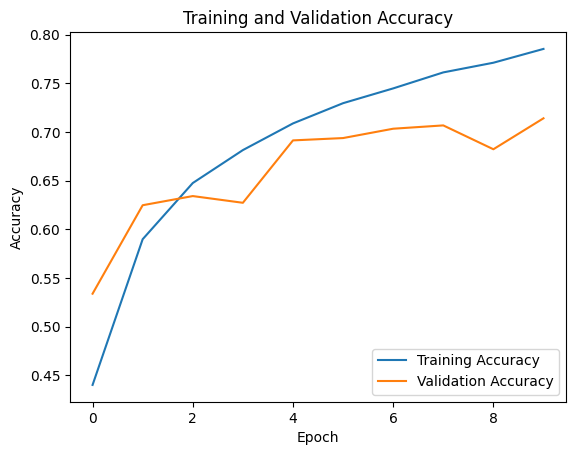

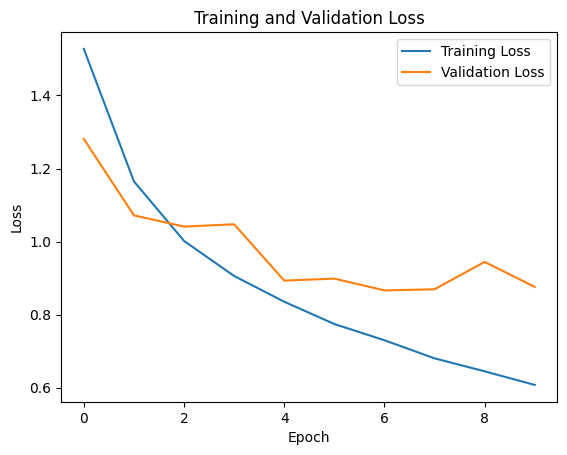

In [24]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


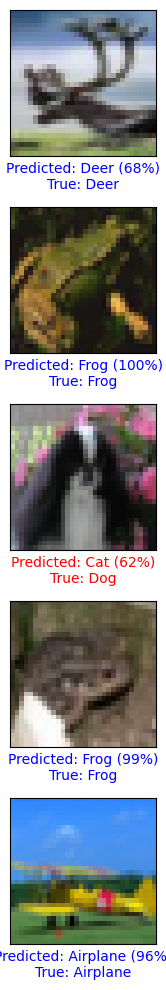

In [33]:
# Add a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, 
                                         layers.Softmax()])

predictions = probability_model.predict(x_test)

# Function to plot the image along with prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicted: {} ({:2.0f}%)\nTrue: {}".format(class_names[predicted_label],
                                100*np.max(predictions_array[i]),
                                class_names[true_label]),
                                color=color)

# Plot the first 5 test images with predictions
num_rows = 5
plt.figure(figsize=(2*2, 2*num_rows))
for i in range(num_rows):
    plt.subplot(num_rows,2,2*i+1)
    plot_image(i+40, predictions, y_test, x_test)
plt.tight_layout()
plt.show()

## Results
	•	Training Accuracy: Achieved approximately 85% accuracy on the training dataset after 10 epochs.
	•	Validation Accuracy: Reached about 70% accuracy on the validation (test) dataset.
	•	Test Loss: Observed a gradual decrease in loss, indicating that the model is learning.
	•	Overfitting Signs: Noted a gap between training and validation accuracy, suggesting potential overfitting.

This was a good baseline model for predictions. This project could be taken further by trying alternative models and tweaking the paramaters to see if higher accuracy could be achieved.